# Disjoint_Paths_Problems
## Section One Algorithm

In [151]:
# pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [191]:
def greedy_disjoint_paths(directed_graph, node_pairs, capacity, pricing = False):
    '''
    ::param: directed_graph: directed node pairs list e.g. 
             [(1,2), (3,4), (5,6),(7,8),(9,10),(2,4),(4,6),(6,8),(8,9),(6,11),(8,12),(9,13)]
    ::param: node_pairs: node_pairs to generate path e.g. 
            [(1,10),(3,11),(5,12),(7,13)]
    ::param: capacity: int capacity of edges
    ::return value: (the number of satisfied paths, satisfied paths list)
    '''
    dg = nx.DiGraph()
    dg.add_edges_from(directed_graph)
    nx.set_edge_attributes(dg, name='used', values=0)
    nx.set_edge_attributes(dg, name='weight', values=1)
    beta = 1
    if pricing:
        beta = math.pow(len(directed_graph),1/(capacity+1))
    print(beta)
    pairts_to_cover = list(node_pairs)
    path = list()
    while True:
        # until no new path can be found
        # find all possible path first
        minlen = len(directed_graph) + 1
        minpath = None
        for pair in pairts_to_cover:
            if nx.has_path(G=dg, source=pair[0], target=pair[1]) is False:
                continue
            new_path = nx.shortest_path(G=dg, source=pair[0],target=pair[1], weight='weight')
            # print(new_path, len(new_path))
            if len(new_path) < minlen:
                minlen = len(new_path)
                minpath = new_path
        if minpath == None:
            break
        print(minpath, pairts_to_cover, minlen)
        path.append(minpath)
        update_remove_edges(dg, minpath, capacity, pricing, beta)
        pairts_to_cover.remove((minpath[0],minpath[-1]))
    return (len(node_pairs) - len(pairts_to_cover), path)

def update_remove_edges(graph, path, capacity, pricing, beta = 1):
    '''
    Remove the full edges from the graph
    '''
    for idx in range(len(path)-1):
        edge = (path[idx],path[idx+1])
        graph[edge[0]][edge[1]]['used'] += 1
        graph[edge[0]][edge[1]]['weight'] *= beta
        # print(graph[edge[0]][edge[1]]['weight'])
        if graph[edge[0]][edge[1]]['used'] == capacity:
            graph.remove_edge(edge[0],edge[1])

## Section Two Test Instances

In [192]:
directed_graph = [(1,2), (3,4), (5,6),(7,8),(9,10),(2,4),(4,6),(6,8),(8,9),(6,11),(8,12),(9,13)]
pairs = [(1,10),(3,11),(5,12),(7,13)]
greedy_disjoint_paths(directed_graph, pairs, 1)

1
[3, 4, 6, 11] [(1, 10), (3, 11), (5, 12), (7, 13)] 4
[5, 6, 8, 12] [(1, 10), (5, 12), (7, 13)] 4
[7, 8, 9, 13] [(1, 10), (7, 13)] 4


(3, [[3, 4, 6, 11], [5, 6, 8, 12], [7, 8, 9, 13]])

In [193]:
directed_graph = [(1,5), (2,6), (3,7),(4,8),(5,6),(6,7),(7,8),(7,18),(8,9),(8,24),(9,11),(9,10),(10,12)
                  ,(10,15),(15,16),(16,17),(16,13),(17,14),(18,19),(19,20),(20,21),(21,22),(22,23),(23,12)
                 ,(24,25),(25,26),(26,27),(27,28),(28,13)]
pairs = [(1,11),(2,12),(3,13),(4,14)]
greedy_disjoint_paths(directed_graph, pairs, 2,pricing=True)

3.072316825685847
[1, 5, 6, 7, 8, 9, 11] [(1, 11), (2, 12), (3, 13), (4, 14)] 7
[4, 8, 9, 10, 15, 16, 17, 14] [(2, 12), (3, 13), (4, 14)] 8
[3, 7, 8, 24, 25, 26, 27, 28, 13] [(2, 12), (3, 13)] 9
[2, 6, 7, 18, 19, 20, 21, 22, 23, 12] [(2, 12)] 10


(4,
 [[1, 5, 6, 7, 8, 9, 11],
  [4, 8, 9, 10, 15, 16, 17, 14],
  [3, 7, 8, 24, 25, 26, 27, 28, 13],
  [2, 6, 7, 18, 19, 20, 21, 22, 23, 12]])

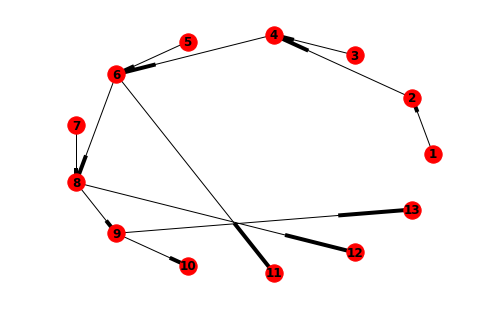

In [194]:
nx.draw_shell(dg, with_labels=True, font_weight='bold')